<h2>Desafio 2 - Machine Learning


<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
    

**Desafio 2** : Aplicar las tecnicas de Machine Learning para calcular el precio por metro cuadrado de las propiedades.

In [1]:
import numpy as np
import pandas as pd
import re

# Libreria Grafica.
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Visualización
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter # Para imprimir los %
from bokeh.tile_providers import CARTODBPOSITRON, get_provider, Vendors 
from bokeh.resources import INLINE

# Libreria para analisis ML
from sklearn import datasets, linear_model

pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

In [2]:
# Definimos la ruta de la información.
data_propiedades = "Data/properati.csv"

# Leemos los datos del archivo
data = pd.read_csv(data_propiedades, sep=",", encoding="UTF-8")

# Chequeamos que los datos se hayan importado correctamente
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
117871,117871,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,NaN,1950000.0,ARS,1929658.27,109363.16,NaN,110.0,NaN,17727.272727,NaN,NaN,NaN,http://www.properati.com.ar/1ce2f_venta_casa_c...,“Nunca te dan un sueño sin concederte también ...,Casa - Quebrada De Las Rosas,https://thumbs4.properati.com/7/-9r46jWa24fZag...
47524,47524,sell,house,Villa Pueyrredón,|Argentina|Capital Federal|Villa Pueyrredón|,Argentina,Capital Federal,3429703.0,"-34.5866935,-58.506856",-34.586694,-58.506856,250000.0,USD,4411125.00,250000.00,250.0,122.0,1000.000000,2049.180328,NaN,NaN,NaN,http://www.properati.com.ar/198g8_venta_casa_v...,CODIGO: 683-1292 ubicado en: Pje. Duarte N° 48...,CASA 3 AMB. CON GARAGE - PATIO - TERRAZA - A R...,https://thumbs4.properati.com/5/AyBC2qfqXS0jwr...
26872,26872,sell,apartment,Nueva Ciudad,|Argentina|Mendoza|Nueva Ciudad|,Argentina,Mendoza,NaN,"-32.8939961,-68.8047456",-32.893996,-68.804746,NaN,NaN,NaN,NaN,100.0,200.0,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/17rmw_venta_depart...,COMPLEJO DE DEPARTAMENTOS SOBRE CALLE PRINGLES...,COMPLEJO DE DEPARTAMENTOS EN NUEVA CIUDAD,https://thumbs4.properati.com/1/DII59KuGJ3GnFQ...
76385,76385,sell,apartment,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.75951,-58.3994779",-34.759510,-58.399478,125000.0,USD,2205562.50,125000.00,64.0,64.0,1953.125000,1953.125000,NaN,NaN,NaN,http://www.properati.com.ar/1arid_venta_depart...,DEPARTAMENTO AL FRENTE consta de estar comedor...,Departamento en Lomas de Zamora Oeste,https://thumbs4.properati.com/4/lCvLDiaydXzp4K...
16357,16357,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9549993,-60.6337851",-32.954999,-60.633785,1110000.0,ARS,1098420.94,62252.88,35.0,31.0,1778.653714,35806.451613,NaN,NaN,NaN,http://www.properati.com.ar/16yd3_venta_depart...,Edificio en construccion. Planta baja y 09 pis...,Edificio en construccion. Amplios monoambiente...,https://thumbs4.properati.com/7/XbfEEAj-il9CgD...


In [3]:
# Chequeamos cantidad de registros y cantidad de columnas
data.shape

(121220, 26)

<h2>Selección de los datos</h2>

En base a los análisis previos realizados sobre el Dataset, tomaremos los datos de CABA únicamente para realizar un modelo de machine learning. 

In [4]:
# Creamos una máscara y la aplicamos al dataframe anterior para traer los registros que necesitamos
data_caba_mask = data.state_name == 'Capital Federal' 
data_caba = data.loc[data_caba_mask, :]

# Chequeamos cómo quedaron los datos
data_caba.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...


In [5]:
data_caba.shape

(32316, 26)

In [6]:
data_caba.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

<a id="section_dataset_nulos"></a> 
<h3>Cálculo de cantidad de nulos</h3>

[volver a TOC](#section_toc)

In [7]:
# # Calculamos cantidad de nulos por campo
# cant_nulos_por_campo = data_caba.isnull().sum()
# cant_nulos_por_campo

In [8]:
# # Calculamos porcentaje de nulos por campo
# cant_registros = data_caba.shape[0]
# print(f'Cantidad Original de registros: {cant_registros}\n')
# #len(data.index) es lo mismo

# porc_nulos_por_campo = np.round((100 * cant_nulos_por_campo / cant_registros),2)
# print(porc_nulos_por_campo)

<h4> Distribución de <strong>property_type</strong>

In [9]:
# Contamos cantidad de valores de cada elemento en property_type y operation para ver distribución
property_type_count = data_caba.property_type.value_counts()
print(f'property_type: \n{property_type_count}')

property_type: 
apartment    27037
house         2087
PH            1828
store         1364
Name: property_type, dtype: int64


In [10]:
# # Convertimos el count anterior en las categorías del gráfico
# categories = np.array(property_type_count.index)

# cord_x = data_caba.property_type.value_counts() / data_caba.shape[0]
# palette = ['#440154', '#29788E', '#22A784', '#FDE724']

# p = figure(x_range=categories, plot_width=500, plot_height=200)
# p.vbar(x=categories, top=cord_x, width=0.6,
#        color=palette)

# p.yaxis.formatter = NumeralTickFormatter(format='0 %')
# output_notebook(resources=INLINE)
# show(p)

<h4>Distribución de <strong>currency</strong></h4>

In [11]:
data_caba.currency.value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

<h4>Distribución de <strong>barrio</strong></h4>

In [12]:
place_name_count = data_caba.place_name.value_counts()
# place_name_count.sort_index()
place_name_count

Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
Coghlan                  259
Retiro                   248
Palermo Chico            232
Chacarita                227
Boca          

<h2>Limpieza de Datos</h2>

<a id="section_dataset_drop"></a> 
<h3> Drop de columnas innecesarias </h3>

[volver a TOC](#section_toc)

In [13]:
# Creamos la lista de columnas a filtrar
drop_columns = ['Unnamed: 0', 'operation', 'place_with_parent_names', 'country_name', 'state_name', 'geonames_id', 'lat-lon','lat', 'lon',
               'expenses','properati_url','title', 'image_thumbnail']

data_caba_clean = data_caba.drop(drop_columns, axis=1)
data_caba_clean.head(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
0,PH,Mataderos,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
2,apartment,Mataderos,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3,PH,Liniers,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...
7,apartment,Belgrano,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8,apartment,Belgrano,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...



<h3> Limpiamos <strong>currency</strong> </h3>

[volver a TOC](#section_toc)

In [14]:
# Creamos una mask para traer los valores en monedas que no son USD ni ARS.
currency_OTHER_CURRENCY_mask = (data_caba_clean.currency == 'PEN') | (data_caba_clean.currency == 'UYU')
# Observamos esos registros
data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :]

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
50387,apartment,Capital Federal,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...
50388,apartment,Capital Federal,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...


In [15]:
# Hacemos drop de esos registros y chequeamos la diferencia entre cantidad original y actual
cant_registros = data_caba_clean.shape[0]
# Dropeamos las moneda PEN y UYU ## OJO la moneda UYU era de una propiedad en Mendoza.
data_caba_clean.drop(data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :].index, inplace = True) 
# Verificamos.
print(f'Cantidad de registros original - registro actuales: {cant_registros - data_caba_clean.shape[0]}')

Cantidad de registros original - registro actuales: 2


<h3> Limpiamos <strong>place_name</strong> </h3>

[volver a TOC](#section_toc)

In [16]:
# Dropeamos los de Capital Federal
capi_mask = data_caba_clean.place_name == 'Capital Federal'
data_caba_clean.drop(data_caba_clean.loc[capi_mask, :].index, inplace=True)

# Chequeamos cómo quedaron los datos
data_caba_clean.shape

(31019, 13)

<h3> Volvemos a calcular cantidad de nulos luego de eliminar columnas y registros

In [17]:
# Calculamos cantidad de nulos por campo
cant_nulos_por_campo = data_caba_clean.isnull().sum()
cant_nulos_por_campo

property_type                     0
place_name                        0
price                          2959
currency                       2959
price_aprox_local_currency     2959
price_aprox_usd                2959
surface_total_in_m2            5707
surface_covered_in_m2          1963
price_usd_per_m2               8416
price_per_m2                   4570
floor                         28070
rooms                         15748
description                       0
dtype: int64

In [18]:
# Calculamos porcentaje de nulos por campo
cant_registros = data_caba_clean.shape[0]
print(f'Cantidad Original de registros: {cant_registros}\n')
#len(data.index) es lo mismo

porc_nulos_por_campo = np.round((100 * cant_nulos_por_campo / cant_registros),2)
print(porc_nulos_por_campo)

Cantidad Original de registros: 31019

property_type                  0.00
place_name                     0.00
price                          9.54
currency                       9.54
price_aprox_local_currency     9.54
price_aprox_usd                9.54
surface_total_in_m2           18.40
surface_covered_in_m2          6.33
price_usd_per_m2              27.13
price_per_m2                  14.73
floor                         90.49
rooms                         50.77
description                    0.00
dtype: float64


In [19]:
data_caba_clean.shape

(31019, 13)

In [20]:
data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
78051,apartment,Villa Urquiza,240000.0,USD,4234680.0,240000.0,80.0,72.0,3000.000000,3333.333333,NaN,NaN,Cómodo y funcional departamento de 4 ambientes...
1616,apartment,Recoleta,227000.0,USD,4005301.5,227000.0,66.0,32.0,3439.393939,7093.750000,NaN,1.0,R Peña 1700. Impecable monoambiente con balcón...
58942,apartment,Barrio Norte,53000.0,USD,935158.5,53000.0,16.0,16.0,3312.500000,3312.500000,NaN,NaN,CODIGO: 2905-SCH11 ubicado en: Uriburu 600 - ...
48671,house,Coghlan,258000.0,USD,4552281.0,258000.0,NaN,245.0,NaN,1053.061224,NaN,4.0,Corredor Responsable: SABRINA COCCONI - CSI 62...
26807,apartment,Belgrano,185000.0,USD,3264232.5,185000.0,89.0,89.0,2078.651685,2078.651685,NaN,4.0,Depto de 4 amb con dependencia al frente con b...


## De los datos filtrados según Desafio 1 deberiamos:

1. Terminar de dropear variables incompletas que serian necesarias para poder entrenar un modelo. (ejemplo: si la propiedad no posee: price, price_aprox_local_currency,price_usd_per_m2, price_per_m2, etc...) la información de los barrios ya fue analizado y dropeado en el paso anterior.
2. Definir las variables CUANTITATIVAS, ejemplo precio, total de m2 de superficie.
3. Armar las variables CUALITATIVAS, Dummy (ejemplo: place_name, property_type, amenities, rooms).
4. Armar una nueva variable Dummy que contemple los precios de propiedad segun su distribución por metro cuadrado. Utilizando Panda CUT. 

## Finalizado el analisis de datos, armamos diferentes modelos para predecir el precio de la propiedad.

1. Regresion Lineal Multiple
2. Entrenar los modelos con Lasso, RidgeCV y utilizando Cross Validation.



### Primero damos homogenidad a los datos

Vamos a realizar ciertas verificaciones de los datos.

In [21]:
# 1. Verificamos que el price y el price_aprox_usd sean los mismos, y luego si fuera así dropeamos el price_aprox_usd

mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd

display(data_caba_clean.loc[mask_price_validation, :].shape)

# Detectamos que hay 4138 propiedades donde los valores son diferentes? pero estan en Pesos o son NaN?

display(data_caba_clean.loc[mask_price_validation, :].sample(10))

# Detectamos que tenemos los dos casos, donde los precios son NaN y donde la moneda está en ARS (lo cual no estaría mal)
# En el caso de ARS, vemos que el valor de price toma el de la moneda local ~ Por lo que podriamos llegar a eliminar price, currency y price_aprox_local_currency 

# Para los valores de NaN tendriamos que tomar la decisión si los dropeamos o tratamos de calcular un precio promedio en base a la cantidad de metros cuadrados.

(4138, 13)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
52238,house,Caballito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Corredor Responsable: Pablo Di Girolamo - CDCP...
91633,apartment,Belgrano,9627039.0,ARS,9526613.85,539919.74,150.0,118.0,3599.464933,81585.076271,NaN,NaN,El emprendimiento tiene unidades entre mediane...
357,apartment,Paternal,1361745.0,ARS,1347539.75,76371.66,32.0,32.0,2386.614375,42554.531250,9.0,NaN,Venta de Departamento 1 AMBIENTE en PaternalEl...
13583,apartment,Once,1561500.0,ARS,1545211.08,87574.66,NaN,59.0,NaN,26466.101695,NaN,1.0,Departamento ideal para estudiantesPrimer Piso...
31424,apartment,Villa del Parque,NaN,NaN,NaN,NaN,192.0,62.0,NaN,NaN,NaN,3.0,Venta de Departamento 3 AMBIENTES CON PATIO Y ...
121005,apartment,Belgrano,NaN,NaN,NaN,NaN,71.0,66.0,NaN,NaN,NaN,NaN,Torre de 16º pisos ubicado en pleno centro com...
27595,store,Belgrano,NaN,NaN,NaN,NaN,300.0,300.0,NaN,NaN,NaN,NaN,"CONTACTO MARTIN PINUS 15 ""importante local sob..."
14728,apartment,Puerto Madero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Corredor Responsable: Mónica Silvia Martinuzzi...
118300,apartment,Nuñez,NaN,NaN,NaN,NaN,57.0,48.0,NaN,NaN,NaN,NaN,"Excelente edificio con detalles de diseño, ubi..."
1886,house,Caballito,NaN,NaN,NaN,NaN,110.0,67.0,NaN,NaN,NaN,NaN,RESERVADA!!!!!!!!!!!


In [22]:
data_caba_clean.shape

(31019, 13)

<h3> Eliminamos registros según un umbral de datos faltantes </h3>

[volver a TOC](#section_toc)

In [23]:
# Elimino primero los registros donde no tengo nada de informacion. 

umbral = 10
data_caba_clean.dropna(axis = 0, thresh=umbral, inplace=True)
# OJO que utilizando umbral de 10 se fueron casi 10000 datos incompletos. 
#--> se pierden 6000 datos aprox (ver shape de abajo), un 20% de los datos aprox

# Vuelvo a ver como quedaron los datos
mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd
display(data_caba_clean.loc[mask_price_validation, :].shape)

display(data_caba_clean.shape)
# display(data_caba_clean.loc[mask_price_validation, :].head(30))
data_caba_clean.sample(5)

(1131, 13)

(25627, 13)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
90496,apartment,Barrio Norte,138000.0,USD,2434941.0,138000.0,55.0,55.0,2509.090909,2509.090909,NaN,NaN,Excelente departamento. Muy luminoso. Living c...
32263,apartment,Villa Ortuzar,107000.0,USD,1887961.5,107000.0,42.0,36.0,2547.619048,2972.222222,NaN,NaN,CODIGO: 1974-620 ubicado en: Balbin 2300 - Pu...
112622,apartment,Villa Luro,118000.0,USD,2082051.0,118000.0,56.0,51.0,2107.142857,2313.725490,NaN,NaN,Venta departamento de 2 ambientes con Balcón T...
35249,PH,Villa Santa Rita,156000.0,USD,2752542.0,156000.0,104.0,67.0,1500.000000,2328.358209,NaN,3.0,PH / departamento tipo casa por pasillo en dos...
85875,apartment,Belgrano,109000.0,USD,1923250.5,109000.0,46.0,46.0,2369.565217,2369.565217,NaN,NaN,"UNIDAD A ESTRENAR en el PISO 13, de 46,45m2, c..."


In [24]:
# Para la superficie de metros cuadadros totales, podemos creer que en caso de ser Nan 
#es porque es un departamente sin balcon y la cantidad de m2 cubierta sería iguala la cantidad de m2 totales.data_caba

data_caba_clean.surface_total_in_m2.fillna(data_caba_clean.surface_covered_in_m2 + (data_caba_clean.surface_covered_in_m2 * 0.10), inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
38043,apartment,Monserrat,140000.0,USD,2470230.00,140000.0,75.0,75.0,1866.666667,1866.666667,NaN,3.0,VENTA DEPARTAMENTO 3 AMBIENTES MONTSERRAT. REC...
85790,store,Villa Devoto,350000.0,USD,6175575.00,350000.0,300.0,220.0,1166.666667,1590.909091,NaN,NaN,VENTA EN BLOCK: 2 locales comerciales + 3 depa...
87566,apartment,Parque Patricios,107540.0,USD,1897489.53,107540.0,56.0,47.0,1920.357143,2288.085106,NaN,NaN,Espai Patricios se encuentra emplazado en el B...
96982,apartment,Palermo,270000.0,USD,4764015.00,270000.0,66.0,66.0,4090.909091,4090.909091,NaN,NaN,Divino departamento en torre. Totalmente recic...
93393,apartment,Flores,376004.0,USD,6634402.57,376004.0,192.0,119.0,1958.354167,3159.697479,NaN,NaN,Unidad de 3 dormitorios grandes. Una suite pri...


<h3> Completamos datos faltantes de superficie </h3>

[volver a TOC](#section_toc)

In [25]:
# Idem al punto anterior pero ahora de surface_total a surface_covered

data_caba_clean.surface_covered_in_m2.fillna(data_caba_clean.surface_total_in_m2, inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
12667,house,Villa Crespo,795000.0,USD,14027377.50,795000.0,342.1,311.0,NaN,2556.270096,NaN,8.0,Corredor Responsable: Veronica Grela Reina - C...
114086,apartment,Barrio Norte,350000.0,USD,6175575.00,350000.0,119.0,88.0,2941.176471,3977.272727,NaN,4.0,Edificio clásico. Depto con palier privado.GRA...
80281,apartment,Recoleta,470000.0,USD,8292915.00,470000.0,148.0,138.0,3175.675676,3405.797101,NaN,NaN,Importante semipiso de 148m2 totales (138 cubi...
13244,apartment,Villa Crespo,123700.0,USD,2182624.65,123700.0,57.2,52.0,NaN,2378.846154,NaN,3.0,Corredor Responsable: Pamela Suarez - CUCICBA ...
59977,apartment,Palermo,730000.0,USD,12880485.00,730000.0,155.0,140.0,4709.677419,5214.285714,NaN,4.0,CONTACTO LEONEL 15 ***LAFINUR WHITE TOWER*** ...


<h3> Completamos datos faltantes de price_usd_per_m2 </h3>

[volver a TOC](#section_toc)

In [26]:
# Idem al punto anterior pero ahora calculamos el precio por metro cuadrado.

data_caba_clean.price_usd_per_m2.fillna(data_caba_clean.price_aprox_usd / data_caba_clean.surface_total_in_m2, inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
87901,apartment,Chacarita,110295.0,USD,1946100.12,110295.0,51.0,48.0,2162.647059,2297.812500,NaN,NaN,Entrega Marzo 2019Forma de pago 50% y 22 cuota...
119119,house,Belgrano,695000.0,USD,12262927.50,695000.0,463.0,235.0,1501.079914,2957.446809,NaN,NaN,"Venta de Casa 5 AMBIENTES en Belgrano, Capital..."
17868,apartment,Boca,128000.0,USD,2258496.00,128000.0,107.0,80.0,1196.261682,1600.000000,NaN,4.0,"Venta de Departamento 4 AMBIENTES en Boca, Cap..."
119800,apartment,Palermo Chico,345000.0,USD,6087352.50,345000.0,80.0,80.0,4312.500000,4312.500000,NaN,3.0,EXCELENTE SEMIPISO-PALIER PRIVADOR- LIVING COM...
56591,apartment,Colegiales,325000.0,USD,5734462.50,325000.0,103.4,94.0,3143.133462,3457.446809,4.0,3.0,Corredor Responsable: Uno Bienes Raices SRL - ...


<h3> Eliminamos floor </h3>

[volver a TOC](#section_toc)

In [27]:
display(data_caba.floor.isnull().count())

# El piso es un dato muy incompleto por lo que se dropea

# Dropeamos la columna creada anteriormente.
data_caba_clean.drop(columns=['floor'], inplace=True)

# En el caso de Rooms lo reemplazamos por 0 --> Lo pasé más abajo
# data_caba_clean.rooms.fillna(0, inplace=True)

32316

In [28]:
display(data_caba.rooms.count())
# En el caso de rooms, podemos tomar que el dato para los NaN es 0?? modifica esto el analisis para predecir? 

15325

<h3> Eliminamos columnas de precios en moneda local </h3>

[volver a TOC](#section_toc)

In [29]:
# Dropeamos los valores que sabemos que está repetidos o con otra moneda.data_caba

data_caba_clean.drop(columns=['price', 'currency','price_per_m2', 'price_aprox_local_currency'], inplace=True)

data_caba_clean.sample(20)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
36207,apartment,Coghlan,448000.0,137.5,125.0,3258.181818,2.0,Corredor Responsable: Gustavo Guastello - C.U....
73376,apartment,Balvanera,139000.0,132.0,110.0,1053.030303,NaN,VENTA DEPARTAMENTO DE 3 AMBIENTES CON DEPENDEN...
19705,apartment,Villa Urquiza,980000.0,323.4,294.0,3030.303030,6.0,Corredor Responsable: Raul Hector Merlo - CUCI...
107048,apartment,Palermo Soho,502200.0,107.0,104.0,4693.457944,NaN,CODIGO: 1237-79 ubicado en: Paraguay 4700 - P...
36681,apartment,Nuñez,138500.0,50.0,46.0,2770.000000,NaN,En VENTA en NUÑEZ2 AMB con BALCON Al frente-Mu...
87251,apartment,Boca,95000.0,77.0,50.0,1233.766234,NaN,Di Mitrio Inmobiliaria promueve y comercializa...
48861,apartment,Belgrano,108000.0,33.0,30.0,3272.727273,1.0,"PISO 2° ""E"". Gran Ambiente, con Balcón !!! Súp..."
96837,apartment,Caballito,90000.0,35.0,33.0,2571.428571,NaN,"IMPECABLE MONOAMBIENTE, MUY LUMMINOSO A METROS..."
86701,apartment,Villa Crespo,82000.0,39.0,34.0,2102.564103,NaN,VENTA EN POZO - UNIDADES DE 1 Y 2 AMBIENTESDep...
10930,PH,Villa Luro,319000.0,170.5,155.0,1870.967742,5.0,Corredor Responsable: Raul Hector Merlo - CUCI...


<h3> Nuevo recuento de nulos </h3>

In [30]:
print('\nPorcentaje de valores incompletos por columna:')
print(f'{round(100 * data_caba_clean.isnull().sum()/data_caba_clean.shape[0], 2)}')

display(data_caba_clean.shape)


Porcentaje de valores incompletos por columna:
property_type             0.00
place_name                0.00
price_aprox_usd           0.00
surface_total_in_m2       0.00
surface_covered_in_m2     0.00
price_usd_per_m2          0.00
rooms                    43.82
description               0.00
dtype: float64


(25627, 8)

<h3>Creación de una columna para categorizar por metros cuadrados

In [31]:
# Delimitamos los bins para realizar un cut
# bins = [20, 30, 45, 75, 150, 220]
bins = [0, 30, 45, 75, 150, 220]
labels = ['mono', 's45', 's75', 's150', 'm220' ]

data_caba_clean['m2_categories'] = pd.cut(data_caba_clean.surface_covered_in_m2, bins, labels)
data_caba_clean['m2_labels'] = pd.cut(x=data_caba_clean.surface_covered_in_m2, bins=bins, labels=labels, right=False)


In [32]:
data_caba_clean.m2_categories.value_counts().sort_index()

(0, 30]       2530
(30, 45]      7452
(45, 75]      7227
(75, 150]     5449
(150, 220]    1572
Name: m2_categories, dtype: int64

In [33]:
data_caba_clean.m2_labels.value_counts().sort_index()

mono    1633
s45     7863
s75     7475
s150    5574
m220    1628
Name: m2_labels, dtype: int64

<a id="section_caba_description"></a> 
<h3> Análisis del campo <strong>description</strong></h3>

[volver a TOC](#section_toc)

Normalización del campo, todo minuscula, sin tildes, etc

In [34]:
data_caba_clean.description = data_caba_clean.description.str.lower()

data_caba_clean.description.sample(10)

63922    corredor responsable: gustavo guastello - c.u....
5666     duplex de 2 ambientes al frente que se desarro...
26478    es un depto 2 amb frente a estrenar con balcon...
9981     departamento monoambiente al frente con salida...
85473    departamento en venta de cuatro ambientes en e...
29164    contacto florencia 15 oro park toweroro y cerv...
26293    sj146- las monedas cambian, los ladrillos qued...
21778    venta de departamento, monoambiente divisible ...
27347    corredor responsable: ariel champanier - c.u.c...
24742    excelente 4 ambientes con dependencia en barri...
Name: description, dtype: object

<a id="section_caba_description_amb"></a> 
<h4> Cantidad de ambientes</h4>

[volver a TOC](#section_toc)

In [35]:
amb_pattern = "((?P<numero_amb>\d)(\s)?(amb|anv|amv|anb))"
amb_pattern_regex = re.compile(amb_pattern)

In [36]:
amb_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      amb_pattern_regex.search(x))
mask_amb_match_notnull = amb_match.notnull()

# Aplicamos el grupo que encuentra el dígito de cantidad de ambientes, casteado como integer
data_caba_clean.loc[mask_amb_match_notnull, 'number_rooms'] = \
amb_match.loc[mask_amb_match_notnull].apply(lambda x: int(x.group("numero_amb")))

In [37]:
dorm_pattern = "((?P<numero_dorm>\d)(\s)?(dorm))"
dorm_pattern_regex = re.compile(dorm_pattern)

In [38]:
dorm_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else dorm_pattern_regex.search(x))

mask_dorm_match_notnull = dorm_match.notnull()

data_caba_clean.loc[mask_dorm_match_notnull, 'number_rooms'] = \
dorm_match.loc[mask_dorm_match_notnull].apply(lambda x: int(x.group("numero_dorm"))+1)

#se asume que el numero de ambientes es numero_dorm +1

Tratamos de llenar los rooms que faltan con lo que obtuvimos de la descripción

In [39]:
data_caba_clean.head(3)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,number_rooms
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,NaN,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,2.0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,NaN,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,2.0
7,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,NaN,excelente monoambiente a estrenar amplio super...,"(30, 45]",s45,NaN


In [40]:
data_caba_clean.rooms.isnull().sum()

11230

In [41]:
data_caba_clean.number_rooms.isnull().sum()

9881

In [42]:
data_caba_clean.rooms.fillna(data_caba_clean.number_rooms, inplace=True)

In [43]:
data_caba_clean.rooms.isnull().sum()

4665

In [44]:
# data_caba_clean.rooms.fillna(0, inplace=True)
# completar con los datos de categorias

In [45]:
data_caba_clean.rooms.value_counts()

2.0     5406
3.0     5262
1.0     4341
4.0     4012
5.0     1266
6.0      362
7.0      174
8.0       57
9.0       27
10.0      24
12.0      11
11.0       9
0.0        4
17.0       3
22.0       1
15.0       1
14.0       1
13.0       1
Name: rooms, dtype: int64

In [46]:
rooms_dict = {
"mono": 1, "s45":  2, "s75":  3, "s150":  4, "m220": 5}

data_caba_clean["rooms_upon_categories"] = data_caba_clean.m2_labels.map(rooms_dict)
data_caba_clean['rooms_upon_categories']

data_caba_clean.rooms.fillna(data_caba_clean.rooms_upon_categories, inplace=True)
data_caba_clean.rooms.isnull().sum()


763

### Llenamos los que faltan según las categorías de los bins???
Además: eliminar los que tengan más de 10 ambientes? Son pocos datos! 

<a id="section_caba_description_amb"></a> 
<h4> Amenities</h4>

[volver a TOC](#section_toc)

<h5> Pileta </h5>

In [47]:
pileta_pattern = "(?P<pileta>pileta|piscina|picina|pisina|pool)"
pileta_pattern_regex = re.compile(pileta_pattern)

In [48]:
pileta_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      pileta_pattern_regex.search(x))
mask_pileta_match_notnull = pileta_match.notnull()

data_caba_clean.loc[mask_pileta_match_notnull, 'pool'] = 1

In [49]:
# data_caba_clean['pool']

In [50]:
data_caba_clean['pool'].notnull().sum()

6161

In [51]:
#Completamos los datos NaN con ceros (convertimos en una variable dummy)
data_caba_clean.pool.fillna(0, inplace = True)

<h5> Laundry </h5>

In [52]:
laudry_pattern = "(?P<laundry>laundry|lavadero)"
laundry_pattern_regex = re.compile(laudry_pattern)

laundry_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      laundry_pattern_regex.search(x))
mask_laundry_match_notnull = laundry_match.notnull()

data_caba_clean.loc[mask_laundry_match_notnull, 'laundry'] = 1

In [53]:
data_caba_clean['laundry'].notnull().sum()

10958

In [54]:
data_caba_clean.laundry.fillna(0, inplace = True)

<h5> Parking </h5>

In [55]:
parking_pattern = "(?P<parking>parking|estacionamiento|garage|cochera|garaje)"
parking_pattern_regex = re.compile(parking_pattern)

parking_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      parking_pattern_regex.search(x))
mask_parking_match_notnull = parking_match.notnull()

data_caba_clean.loc[mask_parking_match_notnull, 'parking'] = 1

In [56]:
data_caba_clean['parking'].notnull().sum()

9796

In [57]:
data_caba_clean.parking.fillna(0, inplace = True)

<h5> Gimnasio </h5>

In [58]:
gym_pattern = "(?P<gimnasio>gim|gym|fitness|fitnes|ejercicio)"
gym_pattern_regex = re.compile(gym_pattern)

gym_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      gym_pattern_regex.search(x))
mask_gim_match_notnull = gym_match.notnull()

data_caba_clean.loc[mask_gim_match_notnull, 'gym'] = 1

In [59]:
data_caba_clean['gym'].notnull().sum()

3363

In [60]:
data_caba_clean.gym.fillna(0, inplace = True)

In [61]:
# plt.figure(figsize=(13,10))
# sns.heatmap(data_caba_clean.corr(),annot=True)
# plt.title("Correlation Heatmap")
# plt.show()

<a id="section_caba_dummies"></a> 
<h3> Creación dummies sobre datos categóricos </h3>

[volver a TOC](#section_toc)

In [62]:
# Usamos la función get_dummies con one-hot encoding (drop_first=True)
property_type_dummies = pd.get_dummies(data_caba_clean['property_type'], drop_first = True, prefix='prop_type')
property_type_dummies

,prop_type_apartment,prop_type_house,prop_type_store
0,0,0,0
2,1,0,0
7,1,0,0
8,1,0,0
13,1,0,0
...,...,...,...
121153,1,0,0
121157,1,0,0
121158,1,0,0
121215,1,0,0


In [63]:
m2_labels_dummies = pd.get_dummies(data_caba_clean['m2_labels'], drop_first = True, prefix='m2_label')

In [64]:
place_name_dummies = pd.get_dummies(data_caba_clean['place_name'], drop_first = True, prefix='place_name')

In [65]:
# Hacemos un join para concatenar las columnas al dataframe
data_caba_clean = data_caba_clean.join([property_type_dummies,m2_labels_dummies, place_name_dummies])

In [66]:
data_caba_clean.head(3)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,number_rooms,rooms_upon_categories,pool,laundry,parking,gym,prop_type_apartment,prop_type_house,prop_type_store,m2_label_s45,m2_label_s75,m2_label_s150,m2_label_m220,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Catalinas,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_Las Cañitas,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Palermo Chico,place_name_Palermo Hollywood,place_name_Palermo Soho,place_name_Palermo Viejo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,2,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,2.0,2,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,2,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,2.0,3,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,2,excelente monoambiente a estrenar amplio super...,"(30, 45]",s45,NaN,2,1.0,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Falta reindexar las filas.

### Falta el dummy de Rooms pero primero hay que ver si completamos los datos con la info de los bins

In [67]:
# Exportamos el archivo para usar en otras notebooks, esto lo guarda en el mismo directorio en el que estamos operando
# data_caba_clean.to_csv('data_caba_clean.csv')

In [68]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics, linear_model

1. Primer modelo
Eliminar rooms nulos
Modelar 

2. Imputar datos faltantes en los rooms
modelar 

3. Eliminar outliers
modelar 

In [69]:
# Funcion para realizar el entrenamiento pero con un set de testeo.

def graf_lineal_model(X, y, y_pred):
    # Graficamos el modelo
    plt.scatter(y_pred, y, s=30, c='b', alpha=0.4)
    plt.plot(y,y, '-.',c='g')
    plt.show()
    print(y.shape)
    print(y_pred.shape)
    return

def train_test_error(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
#    print (feature_cols)
#    print ("y_test sample: ",y_test.values[0:10])
#     print ("y_test sample: ",y_test)
#    print ("y_pred sample: ",y_pred[0:20].astype(int))
#    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    graf_lineal_model(X, y_test, y_pred)
    return 

def train_test_error_lazzo(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.LassoCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Imprime Alpha", model.alpha_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_ridge(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    #model = linear_model.Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
    model = linear_model.RidgeCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)#agr
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_elastic(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.ElasticNetCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

In [70]:
display(data_caba_clean.columns)

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'description',
       'm2_categories', 'm2_labels', 'number_rooms', 'rooms_upon_categories',
       'pool', 'laundry', 'parking', 'gym', 'prop_type_apartment',
       'prop_type_house', 'prop_type_store', 'm2_label_s45', 'm2_label_s75',
       'm2_label_s150', 'm2_label_m220', 'place_name_Agronomía',
       'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
       'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
       'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
       'place_name_Centro / Microcentro', 'place_name_Chacarita',
       'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
       'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
       'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
       'place_name_Monserrat',

RMSE: 29676.697503514544
R2: 0.0021623787501081626


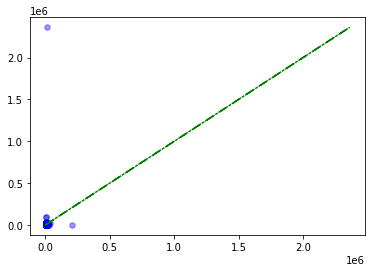

(6407,)
(6407,)


In [71]:
# Regresion lineal Simple

feature_cols = ['price_aprox_usd']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)


RMSE: 31351.431669950027
R2: -0.11363658457882542


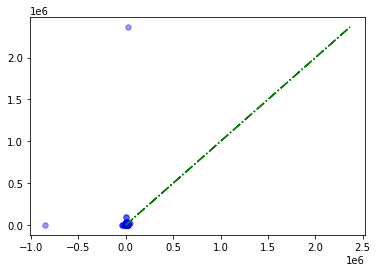

(6407,)
(6407,)


In [72]:
feature_cols = ['surface_total_in_m2', 'price_aprox_usd', 'surface_covered_in_m2']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)


RMSE: 31303.053099118886
R2: -0.1102023185675356


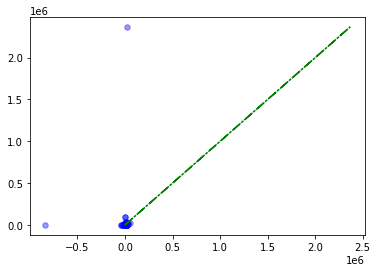

(6407,)
(6407,)


In [73]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

{'alpha': 0.0636672972972973, 'scores': array([0.07533284, 0.19874048, 0.098415  ]), 'mean_score': 0.12416277591056779, 'zero_coefs': 0}
r^2: -0.09324738755090678
Imprime Alpha 0.0636672972972973


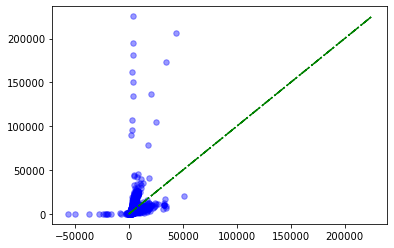

(19220,)
(19220,)


In [74]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']
train_test_error_lazzo(feature_cols, target)

## Recordar que hay variables ROOM es INT!!!!

{'alpha': 0.03874486486486487, 'scores': array([0.00356508, 0.00201259, 0.00311627]), 'mean_score': 0.0028979800710049832, 'zero_coefs': 0}
r^2: -0.010591638526659786
Imprime Alpha 0.03874486486486487


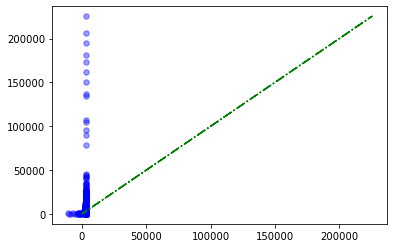

(19220,)
(19220,)


In [75]:
feature_cols = ['surface_total_in_m2']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0636672972972973, 'scores': array([0.07533284, 0.19874048, 0.098415  ]), 'mean_score': 0.12416277591056779, 'zero_coefs': 0}
r^2: -0.09324738755090678
Imprime Alpha 0.0636672972972973


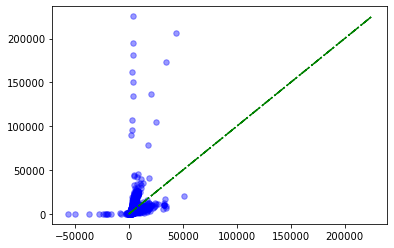

(19220,)
(19220,)


In [76]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

# Necesitamos definir Outliers.

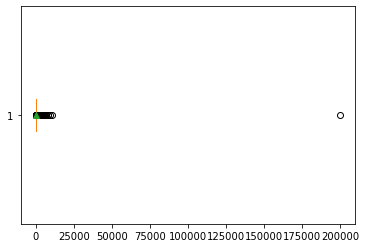

In [77]:
fig, ax = plt.subplots()
bp = ax.boxplot(data_caba_clean['surface_covered_in_m2'].dropna(), vert=False, showmeans=True)


In [78]:
# Definimos outliers aproximados
lower_bound = 0.01
upper_bound = 0.96
rest = data_caba_clean.price_usd_per_m2.quantile([lower_bound, upper_bound])
rest

0.01     760.226087
0.96    6899.555556
Name: price_usd_per_m2, dtype: float64

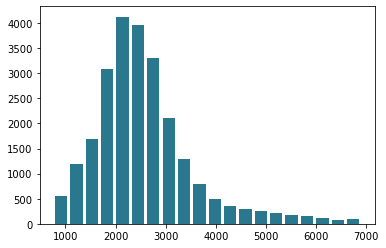

6888.8888888888905
760.8695652173913


In [79]:
# Creamos una mask entendiendo que los precios minimos y maximos pueden rondar los 600 USD y 4000 USD y fijamos outliers aproximados

precioxm2_mask = (data_caba_clean.price_usd_per_m2 >= rest[0.01]) & (data_caba_clean.price_usd_per_m2 <= rest[0.96])
data_caba_clean = data_caba_clean.loc[precioxm2_mask, :]

# Vuelvo a graficar.

plt.hist(data_caba_clean.price_usd_per_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Precio x M2'
plt.ylabel = 'Count'
plt.show()

print(data_caba_clean.price_usd_per_m2.max()) 
print(data_caba_clean.price_usd_per_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 3500...

In [80]:
# Definimos outliers aproximados
lower_bound = 0.001
upper_bound = 0.99
rest = data_caba_clean.surface_covered_in_m2.quantile([lower_bound, upper_bound])
rest

0.001     12.0
0.990    405.0
Name: surface_covered_in_m2, dtype: float64

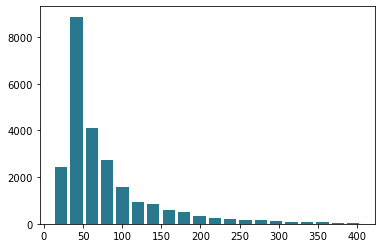

405.0
12.0


In [81]:
# Creamos una mask entendiendo que los precios minimos y maximos pueden rondar los 600 USD y 4000 USD y fijamos outliers aproximados

surface_xm2_mask = (data_caba_clean.surface_covered_in_m2 >= rest[0.001]) & (data_caba_clean.surface_covered_in_m2 <= rest[0.99])
data_caba_clean = data_caba_clean.loc[surface_xm2_mask, :]

# Vuelvo a graficar.

plt.hist(data_caba_clean.surface_covered_in_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Precio x M2'
plt.ylabel = 'Count'
plt.show()

print(data_caba_clean.surface_covered_in_m2.max()) 
print(data_caba_clean.surface_covered_in_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 3500...

RMSE: 830.1097755997107
R2: 0.26617597245130753


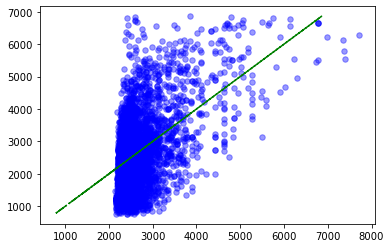

(6020,)
(6020,)


In [82]:
feature_cols = ['price_aprox_usd']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)


RMSE: 549.6294461007273
R2: 0.6782927452161285


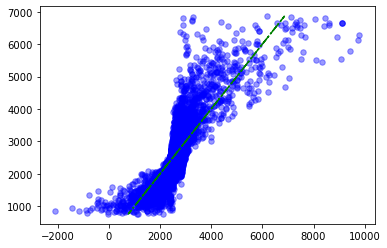

(6020,)
(6020,)


In [83]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

{'alpha': 0.0202281981981982, 'scores': array([0.69510763, 0.66588408, 0.66686216]), 'mean_score': 0.6759512909574559, 'zero_coefs': 1}
r^2: 0.6779965666771557
Imprime Alpha 0.0202281981981982


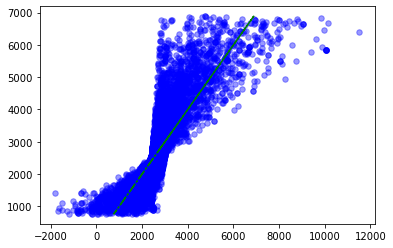

(18059,)
(18059,)


In [84]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0007106306306306308, 'scores': array([0.69541649, 0.66550128, 0.66657921]), 'mean_score': 0.6758323285747373, 'zero_coefs': 0}
r^2: 0.6779981041655819
Coeficientes de la regresión [ 4.64040747e-03 -1.18936234e+01  1.40194560e-01  1.73656958e+02
 -4.92748935e+01  1.23999950e+02  2.35927393e+02  8.34837166e+02]


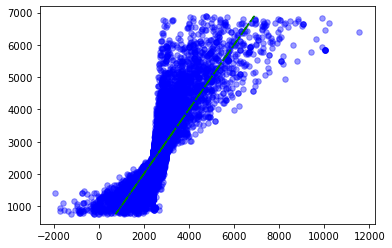

(18059,)
(18059,)


In [85]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

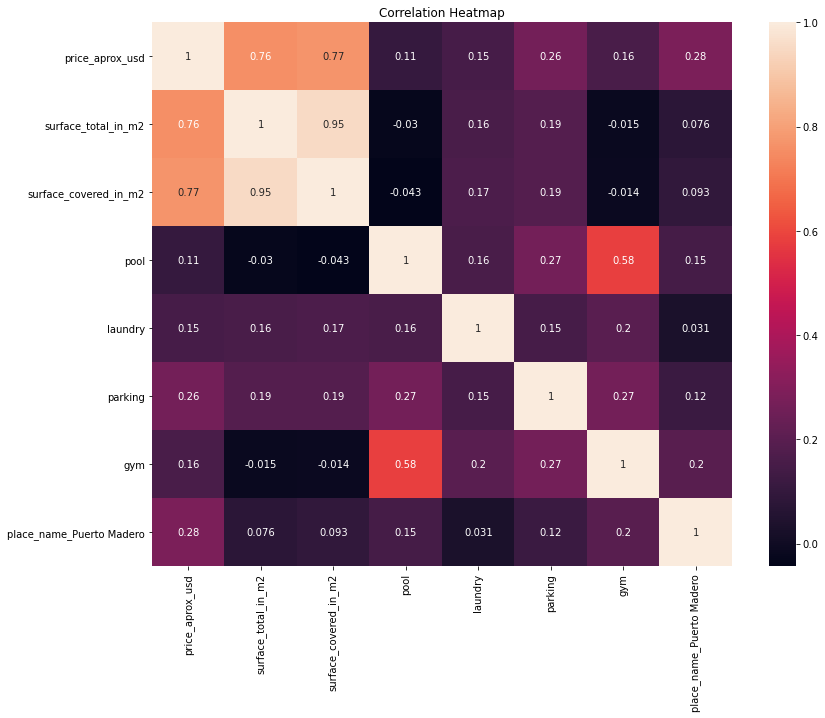

In [86]:
X = data_caba_clean[['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
        'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Para tomar revisar!

{'alpha': 1e-05, 'scores': array([0.54047153, 0.52321648, 0.52644062]), 'mean_score': 0.5300428764635251, 'zero_coefs': 0}
r^2: 0.5349002106863947
Coeficientes de la regresión [ 1.06490648e-03 -2.70608189e-01  2.38268696e+02 -1.51710939e+02
  8.91166221e+01  4.49141801e+02 -1.07936190e+02 -2.70608189e-01
  1.84648598e+02 -6.68054565e+01 -1.87521301e+02  7.76958522e+02
  7.52297274e+02 -3.80119425e+02  4.67902517e+01  2.94468109e+02
 -5.88853875e+02  2.71171266e+02  1.00919290e+02  4.02586266e+02
  3.89156083e+02 -1.48568652e+02 -1.55735855e+02 -2.77039458e+01
 -2.02484192e+02  1.10204228e+03 -2.39799969e+02 -2.95722243e+02
  1.10973824e+00 -7.75080769e+01  6.76855874e+02 -7.85826208e+01
  8.97429811e+02  1.49129861e+03  8.72595362e+02  9.27860254e+02
  9.57146217e+02 -4.73950834e+02  2.41485649e+02 -1.78127037e+02
  1.58586173e+02 -2.08014927e+02 -1.76388099e+01 -5.44192888e+02
  2.41464987e+03  9.54240312e+02  6.63015448e+02  1.51661345e+02
  1.54207654e+02  9.36920111e+01  1.36072094

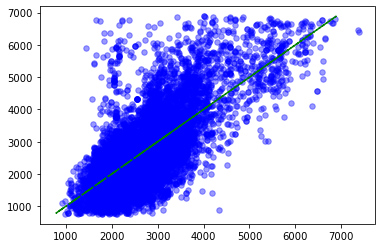

(18059,)
(18059,)


In [87]:
feature_cols = ['price_aprox_usd', 'place_name_Villa del Parque',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

{'alpha': 0.00041036036036036044, 'scores': array([0.65801584, 0.63014774, 0.62404869]), 'mean_score': 0.6374040915597678, 'zero_coefs': 0}
r^2: 0.6410787764096421
Coeficientes de la regresión [ 5.21225362e-03 -1.30001240e+01]


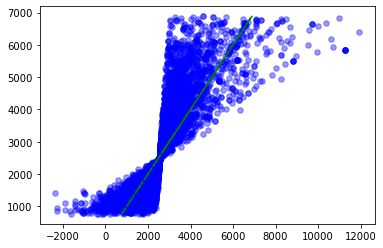

(18059,)
(18059,)


In [88]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.73373538, 0.71993091, 0.72497716]), 'mean_score': 0.7262144846948996, 'zero_coefs': 0}
r^2: 0.7204817914341851
Coeficientes de la regresión [ 2.83763847e-03 -5.80248530e+00 -2.16076126e+00  1.67959813e+02
 -5.60991789e+01  1.39326012e+02  2.90998060e+02 -2.69055920e+02
 -2.48991292e+02 -1.72199583e+02 -3.46875671e+02 -3.72033976e+02
  3.26313245e+02  3.08346183e+02 -6.01002283e+02 -2.95735871e+02
 -8.92897258e+01  1.35498222e+02 -5.97734650e+01 -2.91952533e+02
 -6.39541984e+00  2.69598911e+01 -4.21446019e+02 -5.09708881e+02
 -3.14325622e+02 -4.22403341e+02  5.77473616e+02 -4.00172399e+02
 -3.79854090e+02 -3.28769808e+02 -3.59441953e+02  2.04518591e+02
 -3.70065863e+02  3.96805860e+02  7.50759890e+02  3.54231799e+02
  4.11975548e+02  4.15792765e+02 -5.61237963e+02 -1.05863467e+02
 -3.45008913e+02 -2.63946139e+02 -4.59536989e+02 -3.24601751e+02
 -5.82876103e+02  1.43017634e+03  4.71853856e+02  2.48856020e+02
 -1.64486314e+02 -1.61823708e+02 -2.01017705

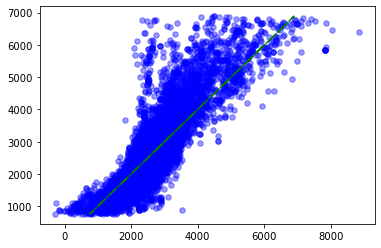

(18059,)
(18059,)


In [89]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_elastic(feature_cols, target)

In [90]:
#Creo una nueva feature a partir de una existente para complejizar el modelo y tratar de obtener un R^2 más elevado
data_caba_clean['surface_covered_in_m2_2']=data_caba_clean['surface_covered_in_m2']**2
data_caba_clean['surface_covered_in_m2_3']=data_caba_clean['surface_covered_in_m2']**3
data_caba_clean.head()

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,number_rooms,rooms_upon_categories,pool,laundry,parking,gym,prop_type_apartment,prop_type_house,prop_type_store,m2_label_s45,m2_label_s75,m2_label_s150,m2_label_m220,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Catalinas,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_Las Cañitas,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Palermo Chico,place_name_Palermo Hollywood,place_name_Palermo Soho,place_name_Palermo Viejo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,surface_covered_in_m2_2,surface_covered_in_m2_3
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,2,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,2.0,2,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1600.0,64000.0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,2,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,2.0,3,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3025.0,166375.0
7,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,2,excelente monoambiente a estrenar amplio super...,"(30, 45]",s45,NaN,2,1.0,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1600.0,64000.0
8,apartment,Belgrano,195000.0,65.0,60.0,3000.000000,3,excelente dos ambientes estrenar amplio super...,"(45, 75]",s75,NaN,3,1.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3600.0,216000.0
13,apartment,Palermo Soho,111700.0,50.0,30.0,2234.000000,1,torre i mondrian. 3 ambientes con terraza y d...,"(0, 30]",s45,3.0,2,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900.0,27000.0


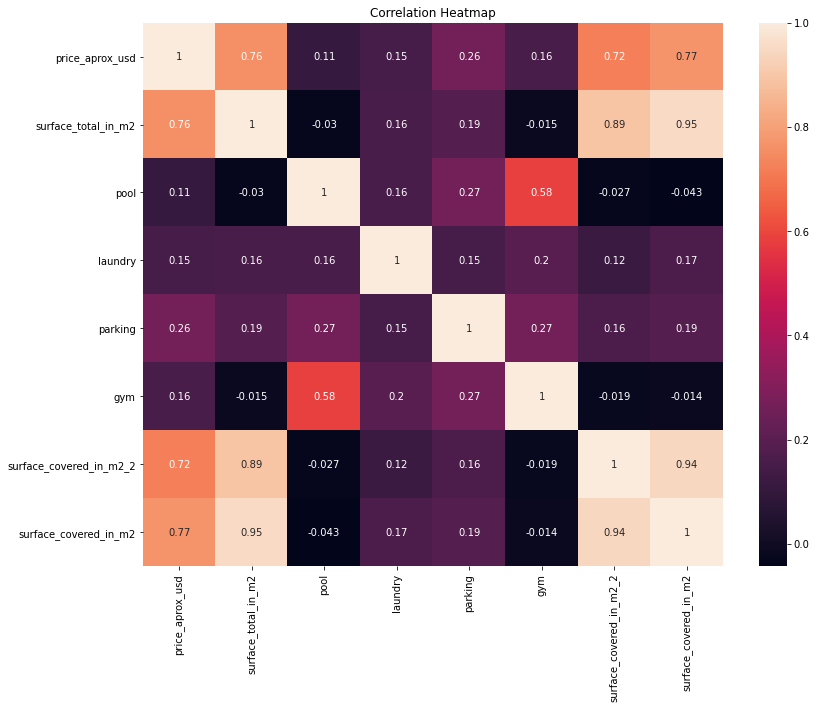

In [91]:
# tomo las nueva feature 'surface_covered_in_m2_2'
X = data_caba_clean[['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                     'surface_covered_in_m2_2','surface_covered_in_m2']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 557.3177060462511
R2: 0.6692296651394525


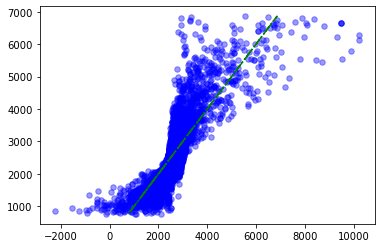

(6020,)
(6020,)


In [92]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

{'alpha': 0.02863576576576577, 'scores': array([0.68362894, 0.6557    , 0.65631136]), 'mean_score': 0.6652134357567493, 'zero_coefs': 2}
r^2: 0.6678445947986789
Imprime Alpha 0.02863576576576577


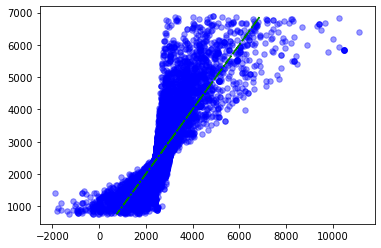

(18059,)
(18059,)


In [93]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0008107207207207209, 'scores': array([0.68323783, 0.65513225, 0.65585434]), 'mean_score': 0.6647414730519815, 'zero_coefs': 0}
r^2: 0.6678485384758763
Coeficientes de la regresión [ 4.87586549e-03 -1.23049452e+01  1.80987659e+02 -5.45072299e+01
  1.28027881e+02  2.67203821e+02 -8.12658145e-02  6.16720967e-04]


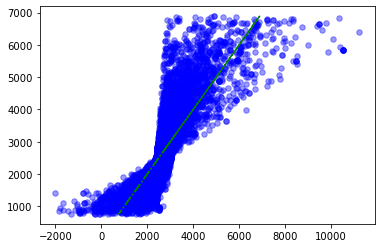

(18059,)
(18059,)


In [94]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

RMSE: 486.2277105477275
R2: 0.7482321430000742


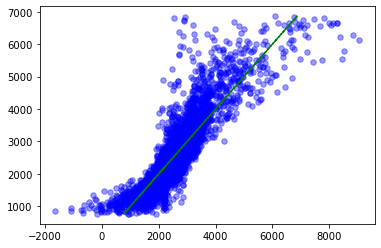

(6020,)
(6020,)


In [95]:
#Pruebo con todas las features y con la creada surface_covered_in_m2_2
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'surface_covered_in_m2_2',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

{'alpha': 0.0030127027027027032, 'scores': array([0.75377272, 0.73483756, 0.73344638]), 'mean_score': 0.7406855501184214, 'zero_coefs': 3}
r^2: 0.7458675760771666
Imprime Alpha 0.0030127027027027032


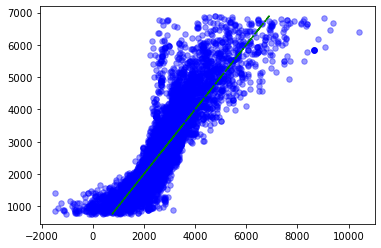

(18059,)
(18059,)


In [96]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2_2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0006105405405405406, 'scores': array([0.75327142, 0.73478364, 0.73346477]), 'mean_score': 0.7405066098156391, 'zero_coefs': 0}
r^2: 0.7458835985906784
Coeficientes de la regresión [ 3.86674760e-03 -1.06716255e+01  3.77185534e-03 -8.26736336e-01
  1.51950503e+02 -5.03902403e+01  1.27220367e+02  2.38882456e+02
  3.69254752e+01  1.14789269e+01  6.59645402e+01 -1.07951900e+02
 -9.89940035e+01  5.21523545e+02  5.20269798e+02 -3.54979073e+02
 -5.11708904e+01  1.45468811e+02  5.05894319e+02  1.65625367e+02
 -7.27557457e+01  2.38376414e+02  2.77879834e+02 -1.85748899e+02
 -2.94257242e+02 -6.68040956e+01 -1.41892717e+02  7.84987537e+02
 -1.00764784e+02 -5.86511357e+01 -1.06389929e+02 -9.20329448e+01
  4.11716121e+02 -1.32639599e+02  5.91646442e+02  7.48999632e+02
  5.68890567e+02  6.42679459e+02  6.15605776e+02 -2.74958708e+02
  1.30894335e+02 -3.74125910e+01 -4.10040756e+01 -2.07842501e+02
 -7.51249963e+01 -2.43151625e+02  1.41472545e+03  6.43492027e+02
  4.10404647e+02  9.87152101

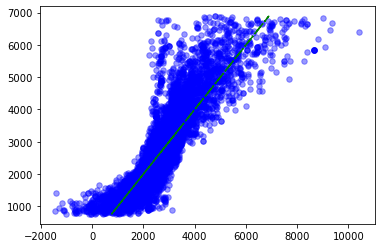

(18059,)
(18059,)


In [97]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2_2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.73391312, 0.71955246, 0.72520007]), 'mean_score': 0.7262218836742727, 'zero_coefs': 0}
r^2: 0.7202580854904201
Coeficientes de la regresión [ 2.84124507e-03 -5.76711368e+00 -5.74160389e-04 -2.05013908e+00
  1.68294838e+02 -5.67115597e+01  1.39204840e+02  2.90571871e+02
 -2.68090494e+02 -2.48879885e+02 -1.71997855e+02 -3.47008027e+02
 -3.72555870e+02  3.26122721e+02  3.08197128e+02 -6.00979384e+02
 -2.94304853e+02 -8.92641192e+01  1.43918777e+02 -5.89844241e+01
 -2.91484565e+02 -5.91266436e+00  2.70356738e+01 -4.21099128e+02
 -5.08371959e+02 -3.14358222e+02 -4.22881052e+02  5.76861069e+02
 -4.00257280e+02 -3.79261444e+02 -3.27721849e+02 -3.59938331e+02
  2.04078996e+02 -3.70032885e+02  3.96366219e+02  7.50386021e+02
  3.54486494e+02  4.12755807e+02  4.14206625e+02 -5.61756287e+02
 -1.06546567e+02 -3.45698826e+02 -2.63283752e+02 -4.59755980e+02
 -3.24517869e+02 -5.84115884e+02  1.42765474e+03  4.71337506e+02
  2.48619119e+02 -1.64572995e+02 -1.61084700

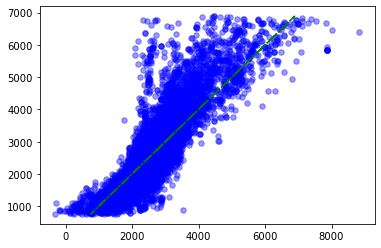

(18059,)
(18059,)


In [98]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2_2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_elastic(feature_cols, target)

In [99]:
# agrego una nueva feature ('surface_covered_in_m2_3')


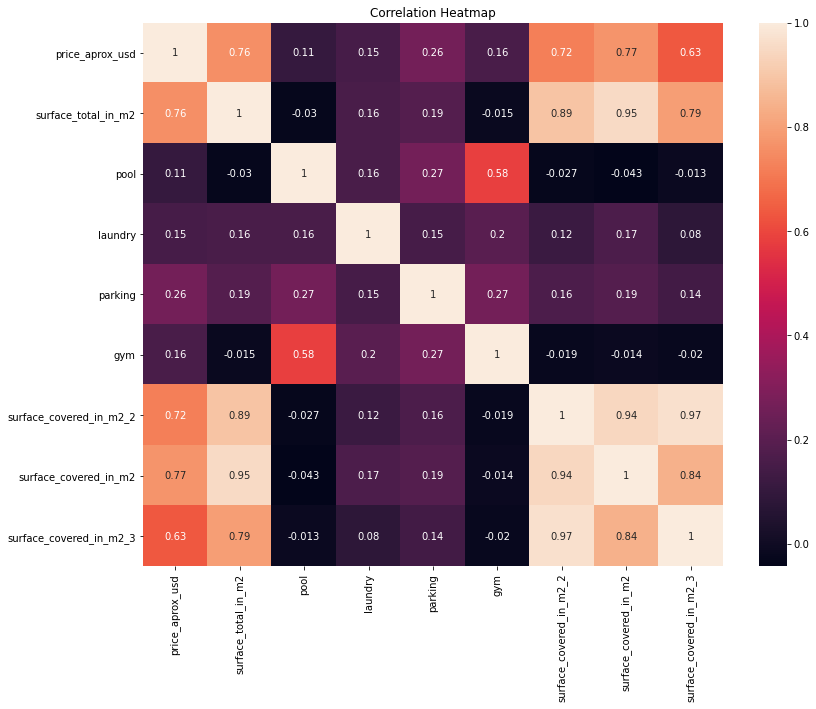

In [100]:
# tomo las nueva features
X = data_caba_clean[['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                     'surface_covered_in_m2_2','surface_covered_in_m2','surface_covered_in_m2_3']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 556.6350596985234
R2: 0.67003947566705


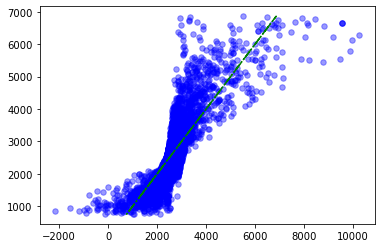

(6020,)
(6020,)


In [101]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42477289.06878376, tolerance: 1398954.1223814345
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34239356.78705883, tolerance: 1405897.9930900729
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32616016.893105507, tolerance: 1411963.1621199977
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_

{'alpha': 0.0002101801801801802, 'scores': array([0.68362684, 0.65522623, 0.65631238]), 'mean_score': 0.6650551513689906, 'zero_coefs': 0}
r^2: 0.6684861701766659
Imprime Alpha 0.0002101801801801802


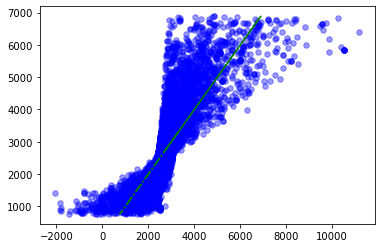

(18059,)
(18059,)


In [102]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0003102702702702703, 'scores': array([0.68401283, 0.65519958, 0.65630325]), 'mean_score': 0.6651718879013215, 'zero_coefs': 0}
r^2: 0.6684875442649552
Coeficientes de la regresión [ 4.88195152e-03 -1.23712400e+01  1.81425391e+02 -5.27088928e+01
  1.26831797e+02  2.66873513e+02 -2.46226564e+00  1.92499607e-02
 -3.62965522e-05]


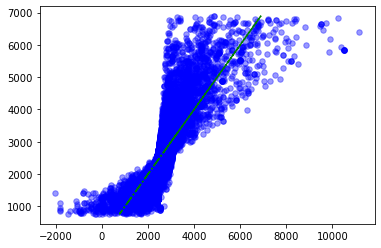

(18059,)
(18059,)


In [103]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

RMSE: 484.9272904984266
R2: 0.7495770525541883


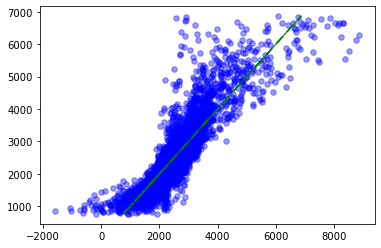

(6020,)
(6020,)


In [104]:
# con todas las features
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'surface_covered_in_m2_2',
                'surface_covered_in_m2_3',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38998770.31522703, tolerance: 1398954.1223814345
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32071101.06579542, tolerance: 1405897.9930900729
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29456629.998895645, tolerance: 1411963.1621199977
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_

{'alpha': 0.0008107207207207209, 'scores': array([0.75417637, 0.73482287, 0.73384746]), 'mean_score': 0.7409489018477026, 'zero_coefs': 0}
r^2: 0.7466365363366966
Imprime Alpha 0.0008107207207207209


C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1778568.1375203133, tolerance: 1170709.568590547
  positive)


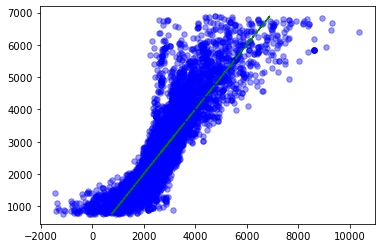

(18059,)
(18059,)


In [105]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'surface_covered_in_m2_2',
                'surface_covered_in_m2_3',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0001100900900900901, 'scores': array([0.75414738, 0.73479578, 0.73393736]), 'mean_score': 0.7409601742545279, 'zero_coefs': 0}
r^2: 0.7466665973584556
Coeficientes de la regresión [ 3.87360738e-03 -1.07297331e+01 -3.47048863e+00  2.41660984e-02
 -3.94838878e-05  1.53033548e+02 -4.79400155e+01  1.25574132e+02
  2.38150804e+02  7.38945145e+01  4.63571607e+01  9.44864001e+01
 -7.69898781e+01 -6.98070965e+01  5.50077156e+02  5.48731840e+02
 -3.23170758e+02 -3.67113575e+01  1.74904834e+02  4.76172917e+02
  1.89193253e+02 -4.59835223e+01  2.64801952e+02  3.05730359e+02
 -1.58637866e+02 -2.70087045e+02 -3.79699437e+01 -1.09147038e+02
  8.10632227e+02 -6.97341323e+01 -3.36757190e+01 -8.31713684e+01
 -5.96099804e+01  4.43941305e+02 -1.02080951e+02  6.20376199e+02
  7.66737395e+02  5.96005784e+02  6.67918064e+02  6.46067988e+02
 -2.46279968e+02  1.61617711e+02 -5.30813715e+00 -1.90783646e+01
 -1.77479315e+02 -4.90510741e+01 -2.11357206e+02  1.44144733e+03
  6.67706947e+02  4.31400411

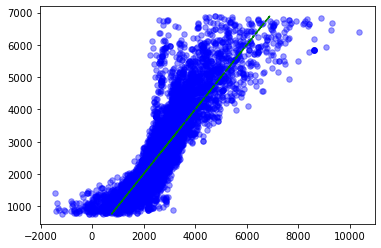

(18059,)
(18059,)


In [106]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'surface_covered_in_m2_2',
                'surface_covered_in_m2_3',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.73381875, 0.71967818, 0.72523846]), 'mean_score': 0.7262451307029689, 'zero_coefs': 0}
r^2: 0.7203783073153598
Coeficientes de la regresión [ 2.84105237e-03 -5.76485609e+00 -2.05923352e+00 -1.31152665e-03
  2.64383683e-06  1.67597286e+02 -5.59730579e+01  1.39536553e+02
  2.90804881e+02 -2.69482510e+02 -2.49272971e+02 -1.72229239e+02
 -3.46741790e+02 -3.71761626e+02  3.26467396e+02  3.08221980e+02
 -6.01052093e+02 -2.95159791e+02 -8.94088987e+01  1.42254591e+02
 -5.92730458e+01 -2.92083512e+02 -6.52645956e+00  2.69177584e+01
 -4.21123572e+02 -5.09618012e+02 -3.14215690e+02 -4.22547742e+02
  5.77526513e+02 -4.00238140e+02 -3.79307165e+02 -3.28366578e+02
 -3.59744746e+02  2.03905561e+02 -3.70014856e+02  3.96636984e+02
  7.51099870e+02  3.54049734e+02  4.11729389e+02  4.15372298e+02
 -5.60388496e+02 -1.05808576e+02 -3.45042299e+02 -2.63690120e+02
 -4.59590101e+02 -3.24454726e+02 -5.82625610e+02  1.42990868e+03
  4.72339875e+02  2.49796589e+02 -1.64881770

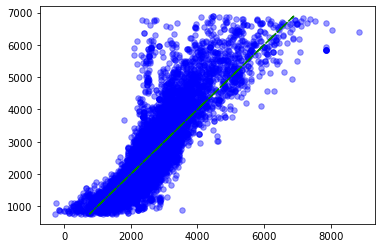

(18059,)
(18059,)


In [107]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'surface_covered_in_m2_2',
                'surface_covered_in_m2_3',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_elastic(feature_cols, target)